In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')['quality'].values
X_test = pd.read_csv('./data/X_test.csv')
y_test = pd.read_csv('./data/y_test.csv')['quality'].values

In [3]:

clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

auc: 0.8049539998895531
accuracy: 0.6109375


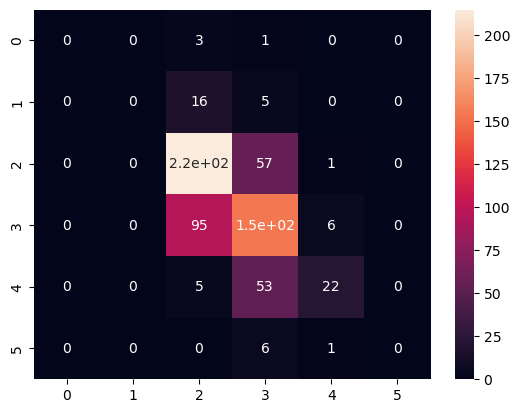

In [5]:
y_test_predict = clf.predict(X_test)
y_test_pred_prob = clf.predict_proba(X_test)

sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True)

print('auc:', roc_auc_score(y_test, y_test_pred_prob, multi_class='ovr'))
print('accuracy:', accuracy_score(y_test, y_test_predict))